In [85]:
import numpy as np
import matplotlib.pyplot as plt
import bspy
import scipy
import math

In [1]:
!pip install bspy==3.0.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.3/76.3 kB 1.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 8.3 MB/s eta 0:00:00a 0:00:01


# ODE \#1

### $$y'(t)=y(t),\qquad y(1)=1$$

### Plot $y(t)$ versus $t$

In [103]:
degree = 3
nknots = 5
knots = np.linspace(0.0, 1.0, nknots + 2) #element from o-1 thats divided into 2 extra for boundary conditions
knots = np.array(degree * [knots[0]] + list(knots) + degree * [knots[-1]]) #knots[0] = initial condition #knots[-1] = final condition

order = degree + 1 #might be -1
n = len(knots) - order #number of knots
collocationpoints = np.linspace(0.0, 1.0, n - 1) #are collocaitons not knot poitns?
collocation = np.zeros((n, n)) #why n by n? 
ix = np.searchsorted(knots, 1.0, side = 'right') #impose boundary condition
ix = min(ix, n) #finding the rightmost know in the bspline segment
# print(knots, ix)
bvalues = bspy.Spline.bspline_values(ix, knots, order, 1.0) #def bspline_values(knot, knots, splineOrder, u, derivativeOrder= #) #this is finding the first derivative
# print(bvalues)
collocation[0, ix - order : ix] = bvalues
# print(collocation)
for irow, t in enumerate(collocationpoints):
    ix = np.searchsorted(knots, t, side = 'right')
    ix = min(ix, n)
    bvalues = bspy.Spline.bspline_values(ix, knots, order, t)
    bvaluesp = bspy.Spline.bspline_values(ix, knots, order, t, 1)
    # print(t, ix, bvaluesp, bvalues)
    collocation[irow + 1, ix - order : ix] = bvaluesp - bvalues #before bvaluesp-bvalues (ins't that y' - y)
    # print(collocation)

rhs = np.zeros((n,))
rhs[0] = 1.0 #why is this set to one?
# print(rhs)

# Solve the linear system

# print(np.linalg.cond(collocation))
lupiv = scipy.linalg.lu_factor(collocation)
alpha = scipy.linalg.lu_solve(lupiv, rhs) #coefficients?

u = bspy.Spline(1, 1, [order], [n], [knots], [alpha]) #creating spline object u and evaluating at different poitns(How many?? need to change first 2 numbers from 1, 1)
# u(0.0), u(0.5), u(1.0)

(-0.05, 1.05, 0.3362734720709464, 1.0316060251394787)

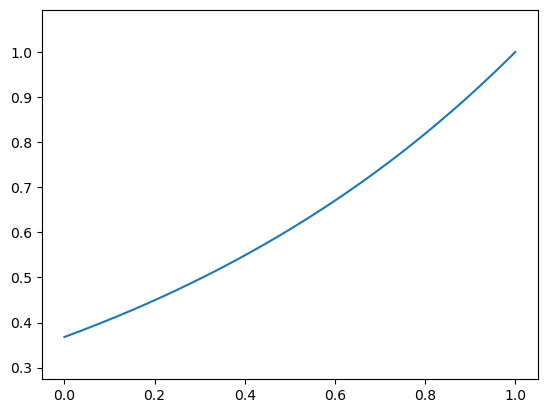

In [104]:
tvals = np.linspace(0.0, 1.0, 1001)
plt.plot(tvals, u(tvals))
# plt.plot(tvals, np.exp(tvals-1), 'r')
# for i in range(u.nCoef[0] - u.order[0]):
#     knot = u.knots[0][i + u.order[0]]
#     plt.plot([knot, knot], [0.2, 1.0], 'g', linestyle = ':')
plt.axis('equal')

# ODE \#2

### $$y''(t)=y(t),\qquad y(0)=1,\quad y(1)=1$$

### Plot $y(t)$ versus $t$

In [68]:
degree = 3
nknots = 15

order = degree + 1 #might be -1
n = len(knots) - order #number of knots

knots = np.linspace(0.0, 1.0, nknots + 2) #element from o-1 thats divided into 2 extra for boundary conditions
knots = np.array(degree * [knots[0]] + list(knots) + degree * [knots[-1]]) #knots[0] = initial condition #knots[-1] = final condition

collocationpoints = np.linspace(0.0, 1.0, n - 2) #are collocaitons not knot poitns? #n-2 cuz 2 boundary conditions
collocation = np.zeros((n, n)) #why n by n? 

ix = np.searchsorted(knots, 0.0, side = 'right') #impose boundary condition
ix = min(ix, n)
bvalues = bspy.Spline.bspline_values(ix, knots, order, 0.0) #def bspline_values(knot, knots, splineOrder, u, derivativeOrder= #) #this is finding the first derivative
collocation[0, ix - order : ix] = bvalues

ix = np.searchsorted(knots, 1.0, side = 'right') #both right
ix = min(ix, n) #finding the rightmost know in the bspline segment
bvalues = bspy.Spline.bspline_values(ix, knots, order, 1.0)
collocation[-1, ix - order : ix] = bvalues #-1 is last one?
# print(collocation)

for irow, t in enumerate(collocationpoints):
    ix = np.searchsorted(knots, t, side = 'right')
    ix = min(ix, n)
    # bvalues = bspy.Spline.bspline_values(ix, knots, order, t)
    bvalues = bspy.Spline.bspline_values(ix, knots, order, t)
    bvaluesp2 = bspy.Spline.bspline_values(ix, knots, order, t, 2)
    # print(t, ix, bvaluesp, bvalues)
    collocation[irow + 1, ix - order : ix] = bvaluesp2 - bvalues #before bvaluesp-bvalues (ins't that y' - y)
    # print(collocation)

rhs = np.zeros((n,))
rhs[0] = 1.0 #why is this set to one?
rhs[-1] = 1
# print(rhs)

# Solve the linear system

# print(np.linalg.cond(collocation))
lupiv = scipy.linalg.lu_factor(collocation)
alpha = scipy.linalg.lu_solve(lupiv, rhs) #coefficients?

u = bspy.Spline(1, 1, [order], [n], [knots], [alpha]) #creating spline object u and evaluating at different poitns(How many?? need to change first 2 numbers from 1, 1)
# u(0.0), u(0.5), u(1.0)

[1. 0. 0. 0.]


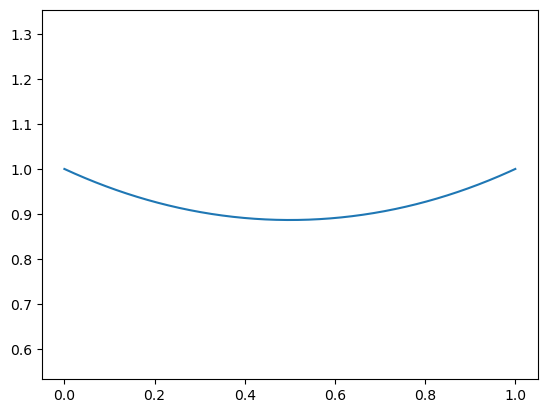

In [67]:
tvals = np.linspace(0.0, 1.0, 1001)
plt.plot(tvals, u(tvals))
plt.axis('equal') 
#change bounds from o-1 on y

In [ ]:
#degree 3-5
#nknots = 5
#2 xtra points to define staert and end
#vertical lines are interior knots
# order is 1 bigger than degree becaus ehav econstant
#first line of collocation amtrix is boundary condition so for collocation points need (n-# of boundary conditions)
#order dictates how many non-zero points need in each line from collocation matrix
#bvaluesp = b values prime (bvalues = y(t)
#cololcation[irow + 1, ix-order : ix] = bvaluesp - bvalues #y' - y = 0
    #make irow + 2 if have 2 boundary conditions
y''(t) -> bvaluespp=bspy.Spline.bspline_values(ix, knots, order, t, 2) -> 2 indicates 2nd order derivative

b2 = bspy.Spline(1, 1, [3], [5], [[0.0, 0.0, 0.0, 0.3, 0.7, 1.0, 1.0, 1.0]], [[0, 0, 1.0, 0, 0]])
tvals = np.linspace(0.0, 1.0, 101)
plt.plot(tvals, b2(tvals))
plt.plot([0.3, 0.3], [-0.1, 0.8], 'g', linestyle = ':')
plt.plot([0.7, 0.7], [-0.1, 0.8], 'g', linestyle = ':')
plt.axis('equal')

bi = bspy.Spline(1, 1, [3], [5], [[0.0, 0.0, 0.0, 0.3, 0.7, 1.0, 1.0, 1.0]], [[0.0, 0, 0, 0, 0]])
tvals = np.linspace(0.0, 1.0, 101)
for i in range(5):
    bi.coefs[0][i] = 1.0
    plt.plot(tvals, bi(tvals))
    bi.coefs[0][i] = 0.0
plt.plot([0.3, 0.3], [-0.1, 1.0], 'g', linestyle = ':')
plt.plot([0.7, 0.7], [-0.1, 1.0], 'g', linestyle = ':')
plt.axis('equal')

# ODE \#3

### $$y'(t)=\begin{pmatrix}0 & -\pi\cr \pi & 0\cr\end{pmatrix}y(t),\qquad y(0)=\begin{pmatrix}1\cr 0\cr\end{pmatrix}$$

### Plot $y_2(t)$ versus $y_1(t)$

In [117]:
degree = 3
nknots = 9
knots = np.linspace(0.0, 1.0, nknots + 2) #element from o-1 thats divided into 2 extra for boundary conditions
knots = np.array(degree * [knots[0]] + list(knots) + degree * [knots[-1]]) #knots[0] = initial condition #knots[-1] = final condition

order = degree + 1 #might be -1
n = len(knots) - order #number of knots

collocationpoints = np.linspace(0.0, 1.0, n - 1) #n - # of boundary conditions (t)
collocation = np.zeros((2 * n, 2 * n)) #why n by n? 

ix = np.searchsorted(knots, 0.0, side = 'right') #impose boundary condition (t value is the num)
ix = min(ix, n)
bvalues = bspy.Spline.bspline_values(ix, knots, order, 0.0) #def bspline_values(knot, knots, splineOrder, u, derivativeOrder= #) #this is finding the first derivative
collocation[0, 2 * (ix-order) : 2 * ix : 2] = bvalues
collocation[1, 2 * (ix-order) + 1 : 2 * ix + 1 : 2] = bvalues

for irow, t in enumerate(collocationpoints):
    ix = np.searchsorted(knots, t, side = 'right')
    ix = min(ix, n)
    bvalues = bspy.Spline.bspline_values(ix, knots, order, t)
    bvaluesp = bspy.Spline.bspline_values(ix, knots, order, t, 1)
    collocation[2 * (irow + 1), 2 * (ix - order) : 2 * (ix) : 2] += bvaluesp
    collocation[2 * (irow + 1), 2 * (ix - order) + 1 : 2 * (ix) + 1 : 2] += np.pi*bvalues
    collocation[2 * (irow + 1) + 1, 2 * (ix - order) : 2 * (ix) : 2] -= np.pi*bvalues
    collocation[2 * (irow + 1) + 1, 2 * (ix - order) + 1 : 2 * (ix) + 1 : 2] += bvaluesp

rhs = np.zeros((2*n,))
rhs[0] = 1.0 #why is this set to one?
rhs[1] = 0 #y(1) = -1 #b

lupiv = scipy.linalg.lu_factor(collocation)
solution = scipy.linalg.lu_solve(lupiv, rhs) #coefficients?
alpha = solution[0: :2]
beta = solution[1: :2]
u = bspy.Spline(1, 2, [order], [n], [knots], [alpha, beta]) #creating spline object u and evaluating at different poitns(How many?? need to change first 2 numbers from 1, 1)
# u(0.0), u(0.5), u(1.0)
#2x2 matrix is 2 systems of equations

(-1.099999999996755,
 1.0999999999998458,
 -0.04998699902419261,
 1.04972697950804)

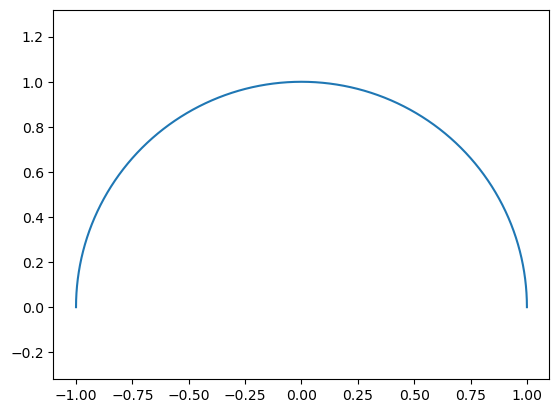

In [118]:
y1, y2 = u(np.linspace(0.0, 1.0, 1001))
plt.plot(y1, y2)
plt.axis('equal') #change the axis

# ODE \#4

### $$y'(t)=2ty(t),\qquad y(0)=1$$

### Plot $y(t)$ versus $t$

In [83]:
degree = 3
nknots = 43
knots = np.linspace(0.0, 1.0, nknots + 2) #element from o-1 thats divided into 2 extra for boundary conditions
knots = np.array(degree * [knots[0]] + list(knots) + degree * [knots[-1]]) #knots[0] = initial condition #knots[-1] = final condition

order = degree + 1 #might be -1
n = len(knots) - order #number of knots

collocationpoints = np.linspace(0.0, 1.0, n - 1) #are collocaitons not knot poitns?
collocation = np.zeros((n, n)) #why n by n? 

ix = np.searchsorted(knots, 0.0, side = 'right') #impose boundary condition
ix = min(ix, n)
bvalues = bspy.Spline.bspline_values(ix, knots, order, 0.0) #def bspline_values(knot, knots, splineOrder, u, derivativeOrder= #) #this is finding the first derivative
collocation[0, ix - order : ix] = bvalues

for irow, t in enumerate(collocationpoints):
    ix = np.searchsorted(knots, t, side = 'right')
    ix = min(ix, n)
    bvalues = bspy.Spline.bspline_values(ix, knots, order, t)
    bvaluesp = bspy.Spline.bspline_values(ix, knots, order, t, 1)
    # print(t, ix, bvaluesp, bvalues)
    collocation[irow + 1, ix - order : ix] = bvaluesp - 2 * t * bvalues #before bvaluesp-bvalues (ins't that y' - y)
    # print(collocation)

rhs = np.zeros((n,))
rhs[0] = 1.0 #why is this set to one?
# print(rhs)

# Solve the linear system

# print(np.linalg.cond(collocation))
lupiv = scipy.linalg.lu_factor(collocation)
alpha = scipy.linalg.lu_solve(lupiv, rhs) #coefficients?

u = bspy.Spline(1, 1, [order], [n], [knots], [alpha]) #creating spline object u and evaluating at different poitns(How many?? need to change first 2 numbers from 1, 1)
# u(0.0), u(0.5), u(1.0)

(-0.05, 1.05, 0.9140857713050959, 2.8041988025930005)

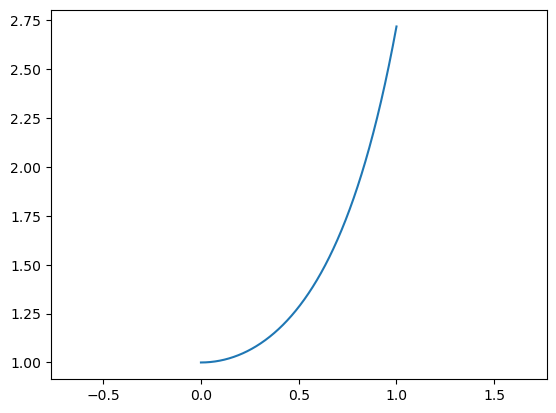

In [84]:
tvals = np.linspace(0.0, 1.0, 1001)
plt.plot(tvals, u(tvals))
plt.axis('equal') #change the axis

# ODE \#5

### $$y''(t)=a(t)y(t)+b(t)y'(t)+c(t),\qquad y(0)=1,\qquad y(1)=-1$$

### Choose $a(t)=5t^2-200$, $b(t)=5-10t-5t^2$, and $c(t)=\cos t + 3t + 1$

### Plot $y(t)$ versus $t$

In [99]:
def a(t):
    return 5 * t**2 - 200
def b(t):
   return 5 - 10 * t - 5 * t**2
def c(t):
    return np.cos(t) + 3 * t + 1
    
degree = 3
nknots = 43
knots = np.linspace(0.0, 1.0, nknots + 2) #element from o-1 thats divided into 2 extra for boundary conditions
knots = np.array(degree * [knots[0]] + list(knots) + degree * [knots[-1]]) #knots[0] = initial condition #knots[-1] = final condition

order = degree + 1 #might be -1
n = len(knots) - order #number of knots
collocationpoints = np.linspace(0.0, 1.0, n - 2) #are collocaitons not knot poitns?
collocation = np.zeros((n, n)) #why n by n? 

ix = np.searchsorted(knots, 0.0, side = 'right') #impose boundary condition
ix = min(ix, n)
bvalues = bspy.Spline.bspline_values(ix, knots, order, 0.0) #def bspline_values(knot, knots, splineOrder, u, derivativeOrder= #) #this is finding the first derivative
collocation[0, ix - order : ix] = bvalues

ix = np.searchsorted(knots, 1, side = 'right') #both right #how get boundary condition on lett?? #number of indp variables #
ix = min(ix, n) #finding the rightmost know in the bspline segment
bvalues = bspy.Spline.bspline_values(ix, knots, order, 1.0) #t=1
print(bvalues)
collocation[-1, ix - order : ix] = bvalues #-1 is last one? #ix - order : ix -> part of bvspline that areb't 0

for irow, t in enumerate(collocationpoints):
    
    ix = np.searchsorted(knots, t, side = 'right')
    ix = min(ix, n)
    bvalues = bspy.Spline.bspline_values(ix, knots, order, t)
    bvaluesp = bspy.Spline.bspline_values(ix, knots, order, t, 1)
    bvaluesp2 = bspy.Spline.bspline_values(ix, knots, order, t, 2)
    # print(t, ix, bvaluesp, bvalues)
    collocation[irow + 1, ix - order : ix] = bvaluesp2 - a(t) * bvalues - b(t) * bvaluesp - c(t) #before bvaluesp-bvalues (ins't that y' - y)
    # print(collocation)

rhs = np.zeros((n,))
rhs[0] = 1.0 #why is this set to one?
rhs[-1] = -1 #y(1) = -1 #b
# print(rhs)

# Solve the linear system

# print(np.linalg.cond(collocation))
lupiv = scipy.linalg.lu_factor(collocation)
alpha = scipy.linalg.lu_solve(lupiv, rhs) #coefficients?

u = bspy.Spline(1, 1, [order], [n], [knots], [alpha]) #creating spline object u and evaluating at different poitns(How many?? need to change first 2 numbers from 1, 1)
# u(0.0), u(0.5), u(1.0)

[0. 0. 0. 1.]


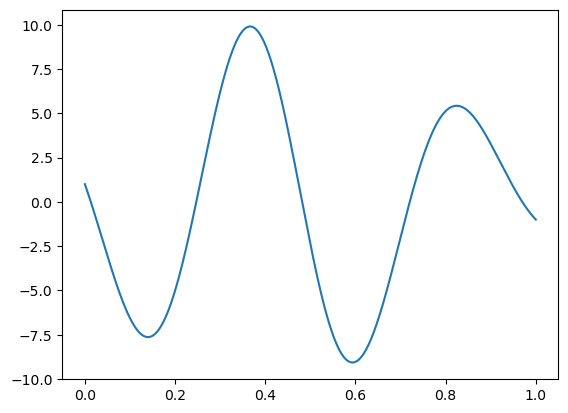

In [100]:
tvals = np.linspace(0.0, 1.0, 1001)
plt.plot(tvals, u(tvals))

# ODE \#6

### $$y''(t)=\begin{pmatrix}-1 & 0 & 1 & 0\cr 0 & -1 & 0 & 1\cr
1 & 0 & -1 & 0\cr 0 & 1 & 0 & -1\cr\end{pmatrix}y(t)-2y'(t),\qquad
y(0)=\begin{pmatrix}0\cr 0.5\cr 1\cr 0.5\cr\end{pmatrix},\qquad
y(1)=\begin{pmatrix}0.7\cr 0.9\cr 0.3\cr 0.1\cr\end{pmatrix}$$

### Plot $y_2(t)$ versus $y_1(t)$ and $y_4(t)$ versus $y_3(t)$

In [122]:
# order is 2
degree = 3
nknots = 9

knots = np.linspace(0.0, 1.0, nknots + 2) #element from o-1 thats divided into 2 extra for boundary conditions
knots = np.array(degree * [knots[0]] + list(knots) + degree * [knots[-1]]) #knots[0] = initial condition #knots[-1] = final condition

order = degree + 1 #might be -1
n = len(knots) - order #number of knots

collocationpoints = np.linspace(0.0, 1.0, n - 2) #n - # of boundary conditions (t)
collocation = np.zeros((4 * n, 4 * n)) #why n by n? 

ix = np.searchsorted(knots, 0.0, side = 'right') #impose boundary condition (t value is the num)
ix = min(ix, n)
bvalues = bspy.Spline.bspline_values(ix, knots, order, 0.0) #def bspline_values(knot, knots, splineOrder, u, derivativeOrder= #) #this is finding the first derivative
collocation[0, 4 * (ix-order) : 4 * ix : 4] = bvalues
collocation[1, 4 * (ix-order) + 1 : 4 * ix + 1 : 4] = bvalues #what adding to ix-oder adding to ix
collocation[2, 4 * (ix-order) + 2 : 4 * ix + 2 : 4] = bvalues
collocation[3, 4 * (ix-order) + 3 : 4 * ix + 3 : 4] = bvalues

ix = np.searchsorted(knots, 1.0, side = 'right') #impose boundary condition (t value is the num)
ix = min(ix, n)
bvalues = bspy.Spline.bspline_values(ix, knots, order, 1.0)
collocation[-4, 4 * (ix-order) : 4 * ix : 4] = bvalues
collocation[-3, 4 * (ix-order) + 1 : 4 * ix + 1 : 4] = bvalues #what adding to ix-oder adding to ix
collocation[-2, 4 * (ix-order) + 2 : 4 * ix + 2 : 4] = bvalues
collocation[-1, 4 * (ix-order) + 3 : 4 * ix + 3 : 4] = bvalues

for irow, t in enumerate(collocationpoints):
    ix = np.searchsorted(knots, t, side = 'right')
    ix = min(ix, n)
    bvalues = bspy.Spline.bspline_values(ix, knots, order, t)
    bvaluesp = bspy.Spline.bspline_values(ix, knots, order, t, 1)
    bvaluesp2 = bspy.Spline.bspline_values(ix, knots, order, t, 2)
    
    collocation[4 * (irow + 1), 4 * (ix - order) : 4 * (ix) : 4] += bvaluesp2 + bvalues + 2 * bvaluesp
    collocation[4 * (irow + 1), 4 * (ix - order) + 2 : 4 * (ix) + 2 : 4] -= bvalues
    
    collocation[4 * (irow + 1) + 1, 4 * (ix - order) + 1 : 4 * (ix) + 1 : 4] += bvaluesp2 + bvalues + 2 * bvaluesp
    collocation[4 * (irow + 1) + 1, 4 * (ix - order) + 3 : 4 * (ix) + 3 : 4] -= bvalues

    collocation[4 * (irow + 1) + 2, 4 * (ix - order) : 4 * (ix) : 4] -= bvalues
    collocation[4 * (irow + 1) + 2, 4 * (ix - order) + 2 : 4 * (ix) + 2 : 4] += bvaluesp2 + bvalues + 2 * bvaluesp
    
    collocation[4 * (irow + 1) + 3, 4 * (ix - order) + 1: 4 * (ix) + 1 : 4] -= bvalues
    collocation[4 * (irow + 1) + 3, 4 * (ix - order) + 3 : 4 * (ix) + 3 : 4] += bvaluesp2 + bvalues + 2 * bvaluesp

rhs = np.zeros((4*n,)) # assuming that one column
rhs[0] = 0 #why is this set to one?
rhs[1] = 0.5 #y(1) = -1 #b
rhs[2] = 1
rhs[3] = 0.5
rhs[-4] = 0.7
rhs[-3] = 0.9
rhs[-2] = 0.3
rhs[-1] = 0.1

lupiv = scipy.linalg.lu_factor(collocation)
solution = scipy.linalg.lu_solve(lupiv, rhs) #coefficients?
alpha = solution[0: :4]
beta = solution[1: :4]
gamma = solution[2: :4]
delta = solution[3: :4]
u1 = bspy.Spline(1, 2, [order], [n], [knots], [alpha, beta]) #creating spline object u and evaluating at different poitns(How many?? need to change first 2 numbers from 1, 1)
u2 = bspy.Spline(1, 2, [order], [n], [knots], [gamma, delta])

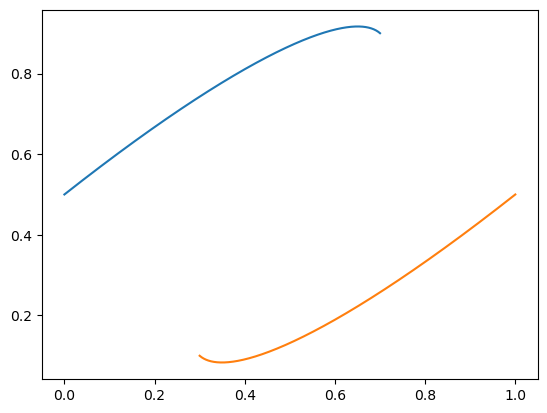

In [123]:
y1, y2 = u1(np.linspace(0.0, 1.0, 1001))
y3, y4 = u2(np.linspace(0.0, 1.0, 1001))
plt.plot(y1, y2)
plt.plot(y3, y4)